<a href="https://colab.research.google.com/github/LukasBeckers/Transformer_Image_Completion/blob/main/Kopie_von_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ImageNet**



## Why is this step needed?
The dataset contains images of various different shapes and sizes. To limit the required computational costs, that are needed to train this model, the images will be (on average) sampled to a lower and uniform resolution.



In [1]:
# Imports

from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from glob import glob, escape
import tensorflow as tf
import pickle as pk
import numpy as np
import shutil
import random
import time
import cv2
import os

In [2]:
# Checking the current directory.

!pwd

/content


In [3]:
# Connecting the notebook to your google-drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Changing to the directory in which the dataset should be saved.

%cd /content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion

/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion


In [15]:
def load_files_paths(folder):
  """
  This function returns all jpeg-files that are in the path, 
  which is given as 'folder' parameter.
  
  :param folder:  str: Path to the folder, 
                       in which the jpeg-images of the dataset are stored.
                       
  :return:       list: List with paths to all the jpeg-files of the folder. 
                       The paths are returned as strings."""

  files = glob(f'{folder}/*.JPEG')
  return files

folders = glob("/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet Birds/*")
files_in_lists = [load_files_paths(folder) for folder in folders]

# Combining all files in one list.
files = []
for sublist in files_in_lists:
    for f in sublist:
        files.append(f)

print(f'Example file: {files[0]}')
print(f'Number of jpeg-files: {len(files)}')

Example file: /content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet Birds/n01514859/n01514859_12658.JPEG
Number of jpeg-files: 23400


In [21]:
def read_image(image_path):
    '''
    This function takes a path to an image as argument and returns the image as 
    numpy array.

    :param image_path: string: Path to the image-file

    :return:           numpy array: Image loaded as numpy array.
    '''
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    return image.astype(np.float32)

There are 18 different classes of birds in this dataset, this image shows two of each class.


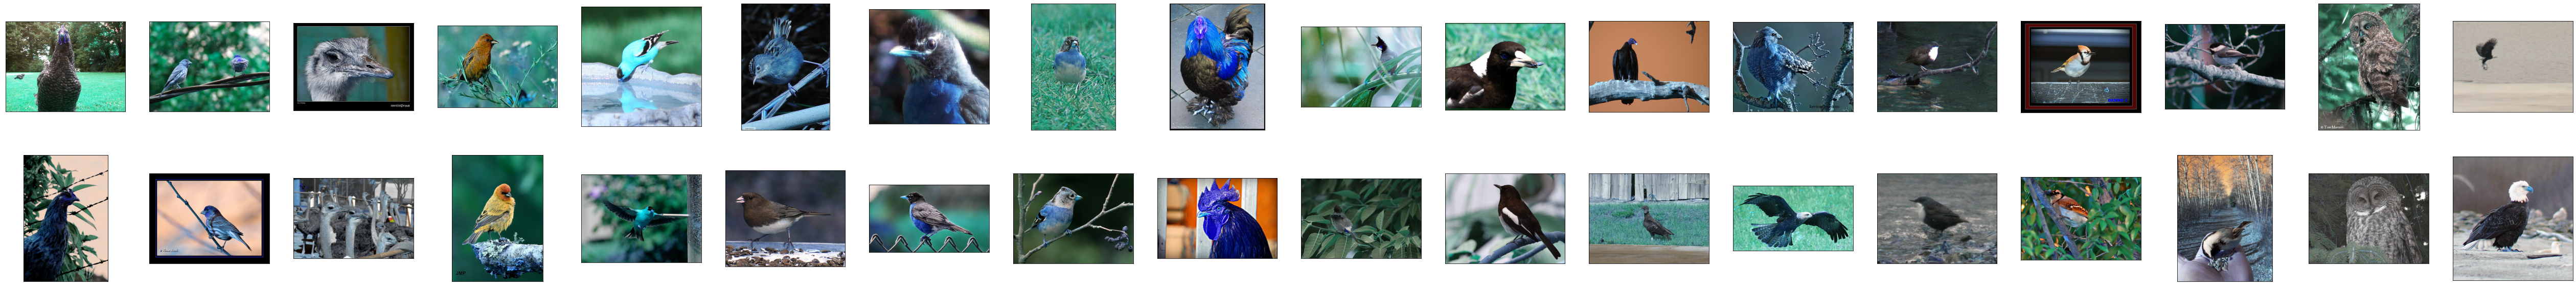

In [35]:
# Testing and Debugging:
test_images = files[::650]

test_images = [read_image(f) for f in test_images]
fig, axs = plt.subplots(2, 18, figsize=[90, 10])
for i, col in enumerate(axs):
    for j, row in enumerate(col):
        row.imshow(test_images[j*2+i]/255)
        row.set_xticks([])
        row.set_yticks([])
print('There are 18 different classes of birds in this dataset, this image shows two of each class.')
plt.show()

In [36]:

# Creating new folders in which the dataset wil be saved.
!mkdir '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet_Birds_128'
ds_dir = '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet_Birds_128'

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet_Birds_128’: File exists


In [37]:
!ls '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet_Birds_128'

In [38]:
!pwd
%pwd


/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion


'/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion'

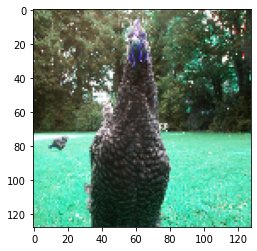

In [40]:
# The images in the new dataset will be reshaped to 128 x 128 pixles (may be adjusted later).

resized_image = cv2.resize(np.array(test_images[0]), [128, 128])
plt.imshow(resized_image/255)
plt.show()

In [41]:
"""
Saving all samples from the dataset.
All samples will be reshaped to a uniform shape.
"""

len_of_ds = len(files)
resize_dimensions = [128, 128]

for i, f in enumerate(files):
  full_image = read_image(f)
  # Reshaping the image.
  resized_image = cv2.resize(np.array(full_image), resize_dimensions)
  # Creating a file-name for the resized_image.
  # The file-name will contain the label in an easyly extractable form. 
  name = f'{i}'
  # Saving the image.
  cv2.imwrite(f'{ds_dir}/{name}.jpeg', np.array(resized_image))


In [42]:
"""
To load each sample from the drive for each training-step turns out to be to slow,
for this reason the dataset is ziped.
The zip-file is loaded to the 'Transformer-Model' colab notebook each 
time the notebook-runtime is started.
"""

shutil.make_archive(ds_dir, 'zip', ds_dir)

'/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/ImageNet_Birds_128.zip'